# RNN Exercise for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.models import load_model

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [28]:
# CODE HERE
df = pd.read_csv('../Data/Miles_Traveled.csv', index_col='DATE', parse_dates=True)

In [29]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [30]:
# CODE HERE
df.columns = ['Value']

In [31]:
df.index.freq='MS'

In [32]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='DATE', length=588, freq='MS')

In [33]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

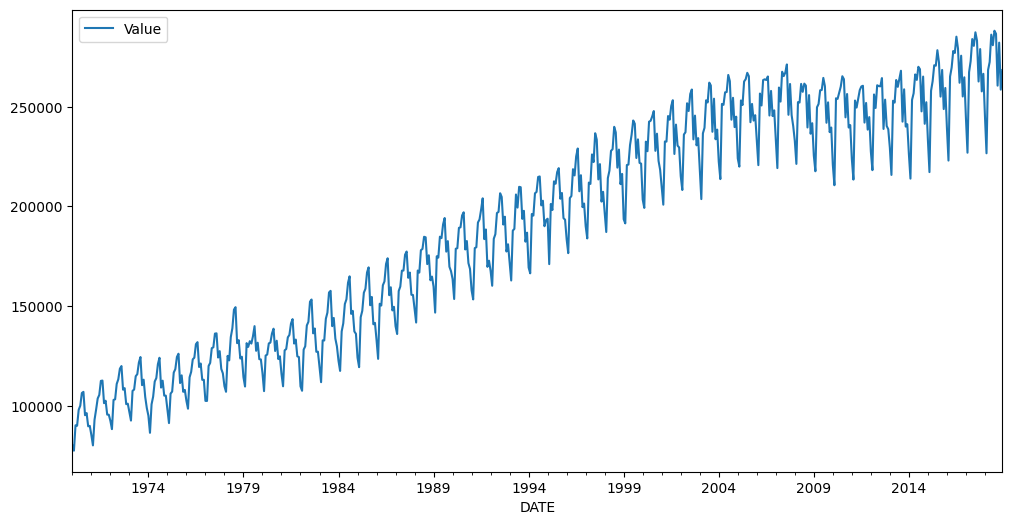

In [34]:
# CODE HERE
df.plot(figsize=(12,6));

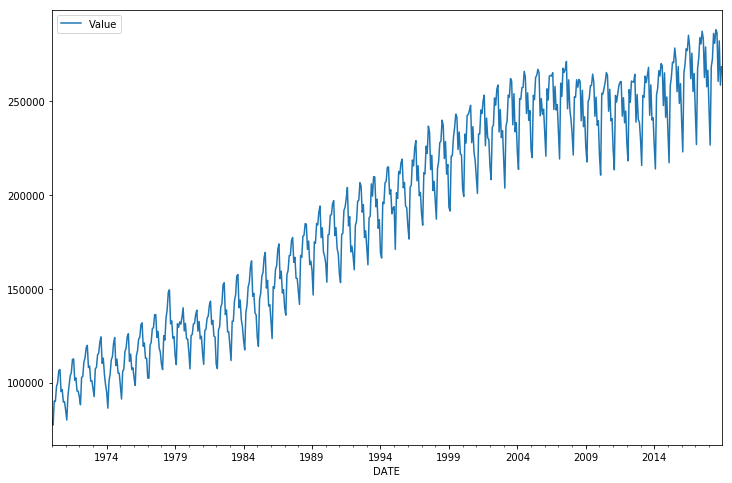

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [35]:
# CODE HERE
results = seasonal_decompose(x=df['Value'])

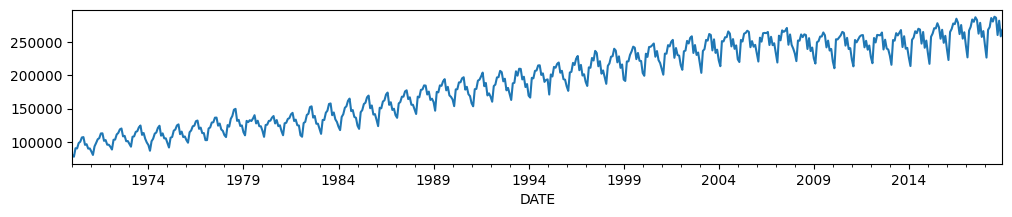

In [36]:
results.observed.plot(figsize=(12,2));

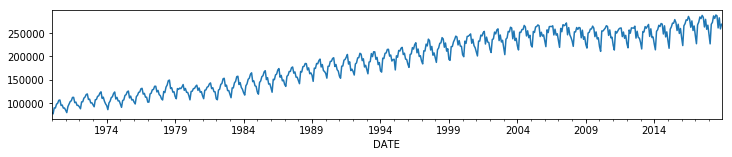

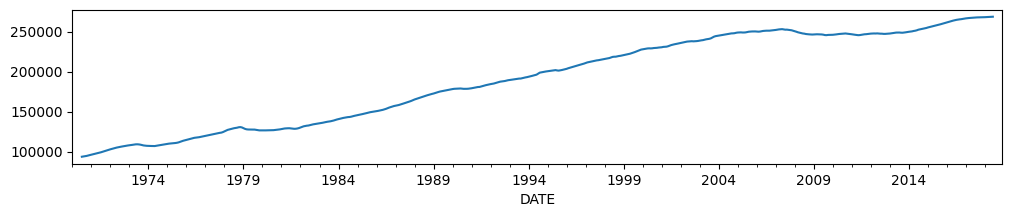

In [37]:
results.trend.plot(figsize=(12,2));

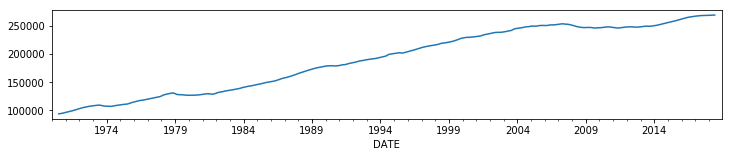

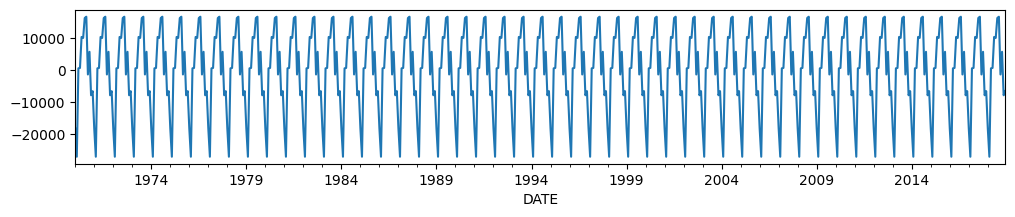

In [39]:
results.seasonal.plot(figsize=(12,2));

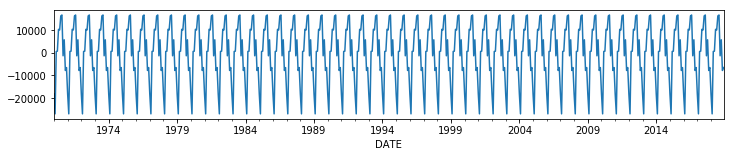

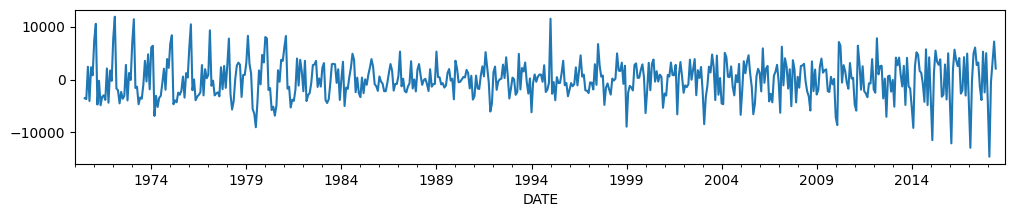

In [40]:
results.resid.plot(figsize=(12,2));

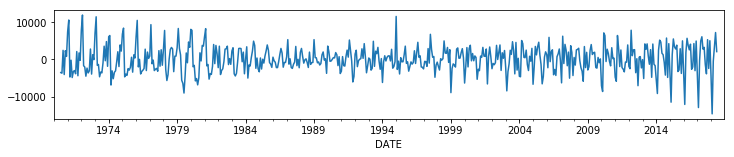

## Train Test Split

**TASK: Figure out the length of the data set**

In [41]:
# CODE HERE
len(df)

588

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [97]:
# CODE HERE
nobs = 48

train = df[:-nobs]
test = df[-nobs:-nobs//2]
val = df[-nobs//2:]

In [98]:
len(train)

540

In [99]:
len(test)

24

In [100]:
len(val)

24

In [16]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [101]:
# CODE HERE
scaler = MinMaxScaler()

In [102]:
scaler.fit(train) # fit only on training data to avoid data leakage

# apply transformation
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
scaled_val = scaler.transform(val) 

MinMaxScaler(copy=True, feature_range=(0, 1))

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [104]:
#CODE HERE
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [105]:
val_generator = TimeseriesGenerator(scaled_val, scaled_val, length=n_input, batch_size=1)

In [106]:
print(len(scaled_train))
print()
print(len(generator))
print()
print(len(val_generator))

540

528

12


In [109]:
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.01409308 0.         0.06595522 0.06457739 0.10594325 0.11658917
 0.14939391 0.15237147 0.09191725 0.09740276 0.06317376 0.06434517]
Predict this y: 
 [[0.04073629]]


Using TensorFlow backend.


### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [110]:
# define LSTM model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [111]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [112]:
# CODE HERE
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

model.fit(generator, epochs=500, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/500
528/528 [==============================] - 3s 4ms/step - loss: 0.0158 - val_loss: 0.0240
Epoch 2/500
528/528 [==============================] - 2s 4ms/step - loss: 0.0057 - val_loss: 0.0077
Epoch 3/500
528/528 [==============================] - 2s 3ms/step - loss: 0.0050 - val_loss: 0.0048
Epoch 4/500
528/528 [==============================] - 2s 4ms/step - loss: 0.0028 - val_loss: 0.0122
Epoch 5/500
528/528 [==============================] - 2s 3ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 6/500
528/528 [==============================] - 2s 4ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 7/500
528/528 [==============================] - 2s 3ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 8/500
528/528 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 0.0022
Epoch 9/500
528/528 [==============================] - 2s 3ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/500
528/528 [==============================] - 2s 3ms/step - loss: 0.0012 - val_lo

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

In [113]:
best_model = load_model('best_model.h5')

In [114]:
# CODE HERE
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

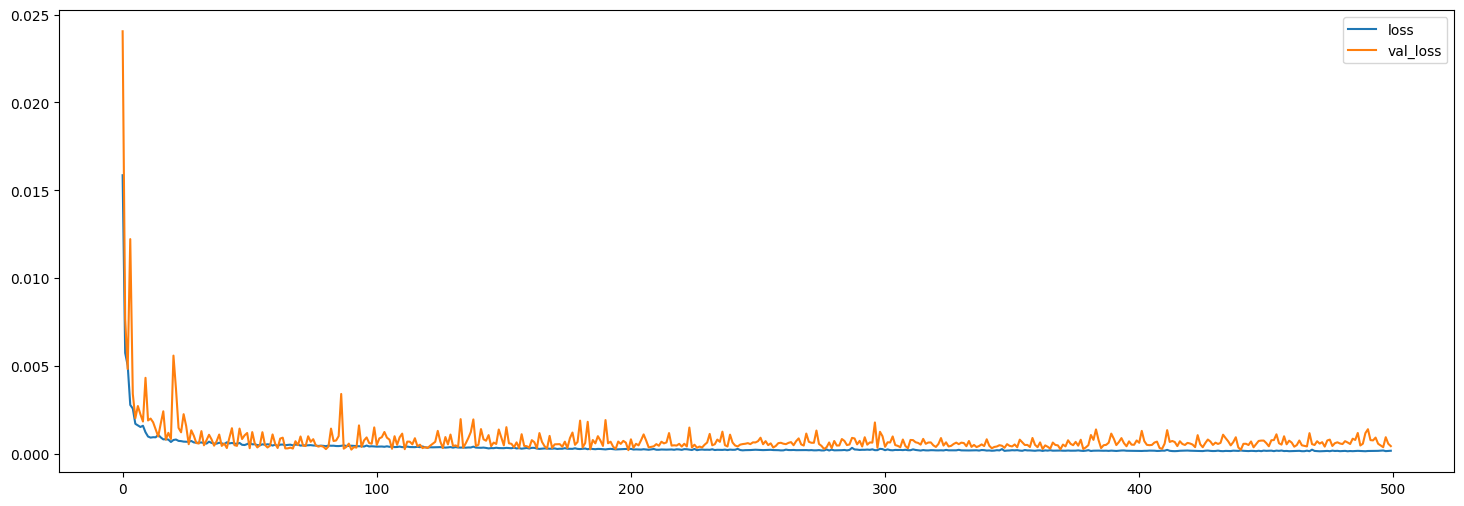

In [117]:
losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(18, 6));

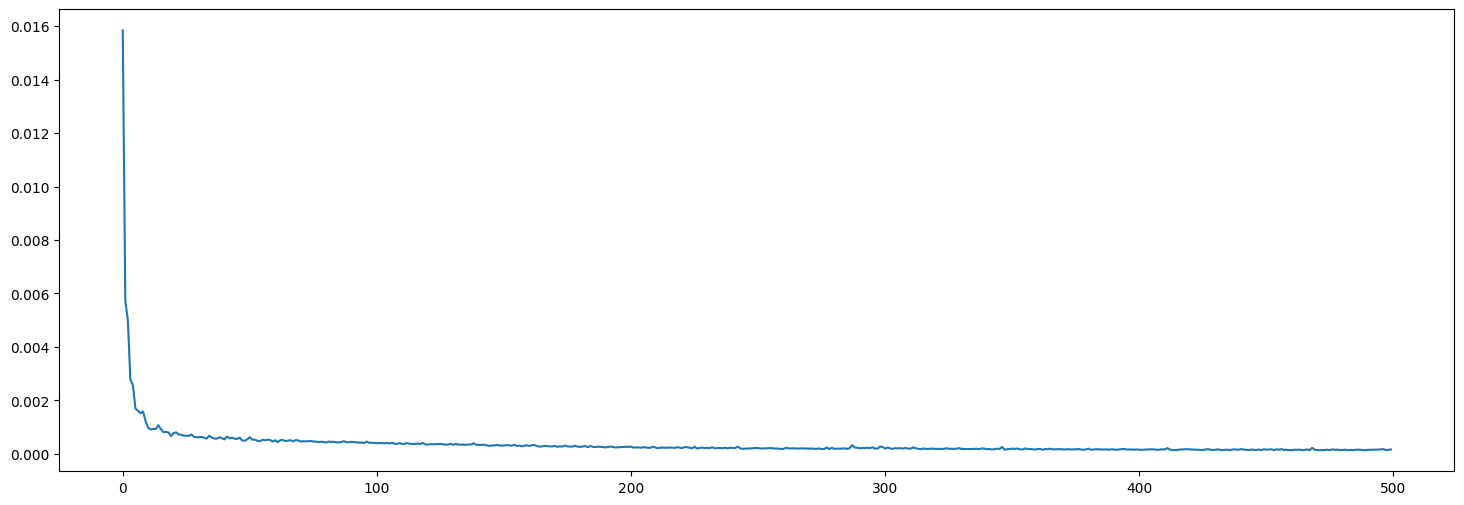

In [118]:
loss_per_epoch = model.history.history['loss']

plt.figure(figsize=(18, 6))
plt.plot(range(len(loss_per_epoch)),loss_per_epoch);

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [119]:
# CODE HERE
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

**TASK: Generate predictions into the same time stamps as the test set**

In [120]:
# CODE HERE
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = best_model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [121]:
test_predictions

[array([0.7825686], dtype=float32),
 array([0.7352339], dtype=float32),
 array([0.92960656], dtype=float32),
 array([0.94474876], dtype=float32),
 array([0.99687135], dtype=float32),
 array([0.98839366], dtype=float32),
 array([1.0210872], dtype=float32),
 array([1.0026484], dtype=float32),
 array([0.9035678], dtype=float32),
 array([0.98768187], dtype=float32),
 array([0.8494164], dtype=float32),
 array([0.92605364], dtype=float32),
 array([0.7879361], dtype=float32),
 array([0.7611047], dtype=float32),
 array([0.9459683], dtype=float32),
 array([0.96308804], dtype=float32),
 array([1.0136888], dtype=float32),
 array([1.01209], dtype=float32),
 array([1.0414922], dtype=float32),
 array([1.0125487], dtype=float32),
 array([0.92932665], dtype=float32),
 array([1.004485], dtype=float32),
 array([0.85240126], dtype=float32),
 array([0.94767344], dtype=float32)]

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [122]:
#CODE HERE
true_predictions = scaler.inverse_transform(test_predictions)

In [123]:
true_predictions

array([[229090.48596609],
       [219917.83141172],
       [257583.94741428],
       [260518.24881756],
       [270618.72124255],
       [268975.88946068],
       [275311.33499575],
       [271738.20590115],
       [252538.07724047],
       [268837.95497942],
       [242044.45342767],
       [256895.45314538],
       [230130.61960423],
       [224931.15265167],
       [260754.5693239 ],
       [264072.08879948],
       [273877.65725732],
       [273567.83021617],
       [279265.48759294],
       [273656.72183967],
       [257529.70689142],
       [272094.11890614],
       [242622.87270021],
       [261085.00221956]])

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [124]:
# CODE HERE
test['Predictions'] = true_predictions

C:\Users\fmiranda\AppData\Local\Temp\ipykernel_3876\246413805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [125]:
test

,Value,Predictions
DATE,,
2015-01-01,233498.0,229090.485966
2015-02-01,217220.0,219917.831412
2015-03-01,258017.0,257583.947414
2015-04-01,262817.0,260518.248818
2015-05-01,270839.0,270618.721243
2015-06-01,270574.0,268975.889461
2015-07-01,278372.0,275311.334996
2015-08-01,272209.0,271738.205901
2015-09-01,255090.0,252538.077240


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

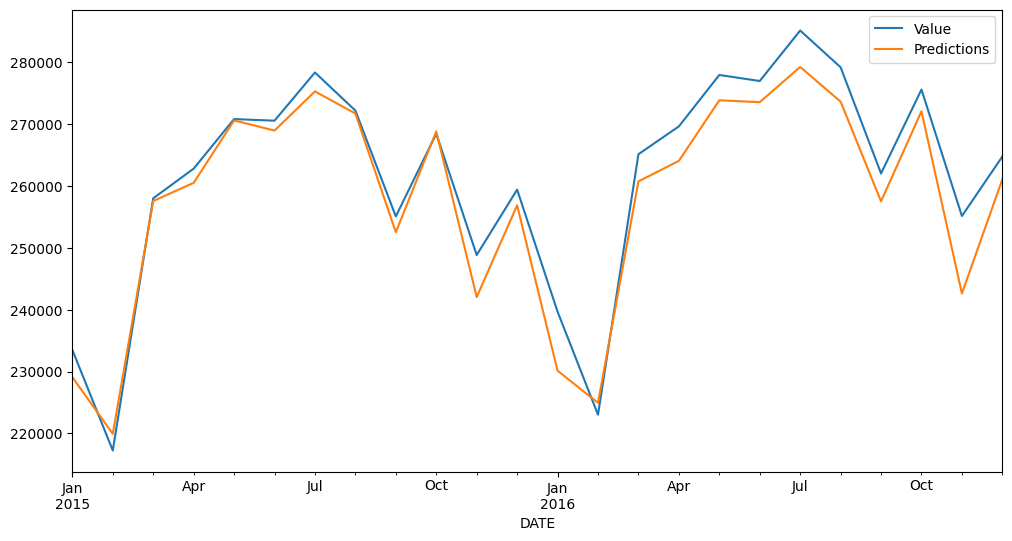

In [126]:
# CODE HERE
test.plot(figsize=(12,6));

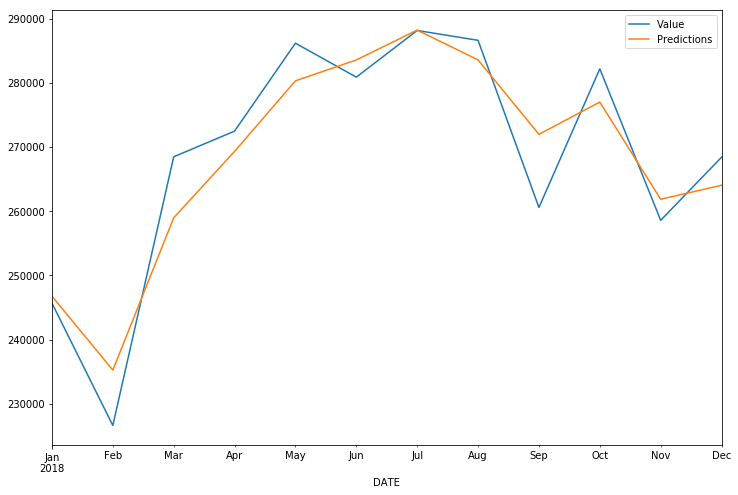

**TASK: repeat the process of the testing set, but now for the VALIDATION set**

In [141]:
val_predictions = []


first_eval_batch = scaled_val[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# Loop over the validation set length
for i in range(len(val)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = best_model.predict(current_batch)[0]
    
    # store prediction
    val_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

val_predictions = np.array(val_predictions)

true_val_predictions = scaler.inverse_transform(val_predictions)

1/1 [==============================] - 0s 25ms/step


In [142]:
val['Predictions'] = true_val_predictions

C:\Users\fmiranda\AppData\Local\Temp\ipykernel_3876\1136772461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['Predictions'] = true_val_predictions


In [143]:
val.head()

,Value,Predictions
DATE,,
2017-01-01,244587.0,246667.953125
2017-02-01,226947.0,231099.875000
2017-03-01,267355.0,270503.968750
2017-04-01,272904.0,274020.468750
2017-05-01,283956.0,284751.531250


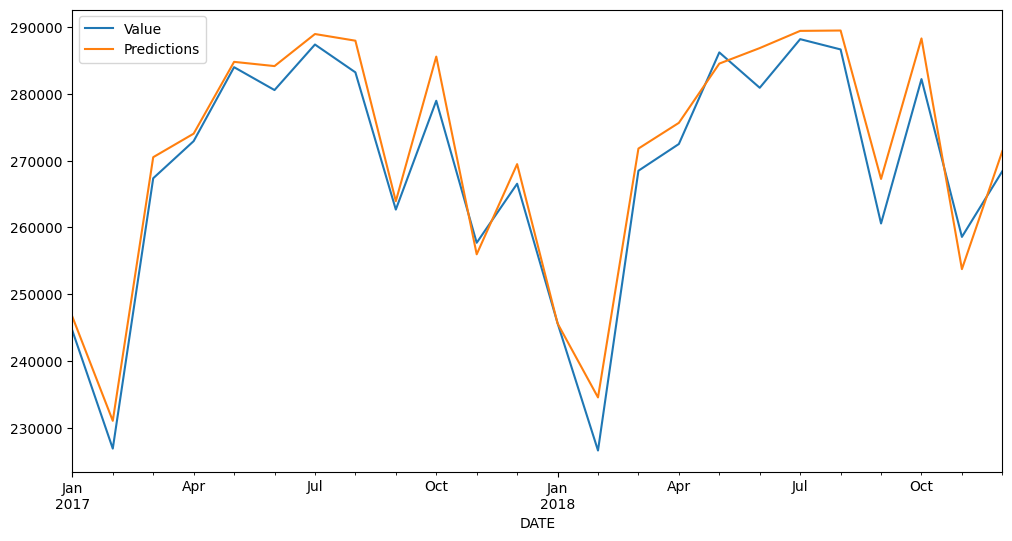

In [144]:
val.plot(figsize=(12,6));

# Draw metrics

**Use a range of metrics to assess the model you created**

In [145]:
y_true = test['Value']
y_pred = test['Predictions']

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error, mean_squared_log_error, median_absolute_error, mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance
from math import sqrt
import numpy as np

# for MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = test['Value']
y_pred = test['Predictions']

# calculate metrics
MAE = mean_absolute_error(y_true, y_pred)
MSE = mean_squared_error(y_true, y_pred)
RMSE = sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
explained_variance = explained_variance_score(y_true, y_pred)
max_error_val = max_error(y_true, y_pred)
MSLE = mean_squared_log_error(y_true, y_pred)
MedAE = median_absolute_error(y_true, y_pred)
mean_poisson = mean_poisson_deviance(y_true, y_pred)
mean_gamma = mean_gamma_deviance(y_true, y_pred)
mean_tweedie = mean_tweedie_deviance(y_true, y_pred)

# print metrics
print(f"The Mean Absolute Error of the LSTM/RNN model is: {MAE}")
print(f"The Mean Squared Error of the LSTM/RNN model is: {MSE}")
print(f"The Root Mean Squared Error of the LSTM/RNN model is: {RMSE}")
print(f"The Mean Absolute Percentage Error of the LSTM/RNN model is: {MAPE}")
print(f"The R-squared of the LSTM/RNN model is: {r2}")
print(f"The Explained Variance Score of the LSTM/RNN model is: {explained_variance}")
print(f"The Maximum Error of the LSTM/RNN model is: {max_error_val}")
print(f"The Mean Squared Logarithmic Error of the LSTM/RNN model is: {MSLE}")
print(f"The Median Absolute Error of the LSTM/RNN model is: {MedAE}")
print(f"The Mean Poisson Deviance of the LSTM/RNN model is: {mean_poisson}")
print(f"The Mean Gamma Deviance of the LSTM/RNN model is: {mean_gamma}")
print(f"The Mean Tweedie Deviance of the LSTM/RNN model is: {mean_tweedie}")


The Mean Absolute Error of the LSTM/RNN model is: 3837.268586675326
The Mean Squared Error of the LSTM/RNN model is: 22766275.93730202
The Root Mean Squared Error of the LSTM/RNN model is: 4771.401883859923
The Mean Absolute Percentage Error of the LSTM/RNN model is: 1.4833532116780144
The R-squared of the LSTM/RNN model is: 0.9246640841191356
The Explained Variance Score of the LSTM/RNN model is: 0.9634069267734557
The Maximum Error of the LSTM/RNN model is: 12531.127299785614
The Mean Squared Logarithmic Error of the LSTM/RNN model is: 0.0003574961836880588
The Median Absolute Error of the LSTM/RNN model is: 3469.5254388451576
The Mean Poisson Deviance of the LSTM/RNN model is: 90.50914154489146
The Mean Gamma Deviance of the LSTM/RNN model is: 0.000361302403430519
The Mean Tweedie Deviance of the LSTM/RNN model is: 22766275.93730202


In [147]:
y_true_val = val['Value'] 
y_pred_val = val['Predictions']  

In [148]:
# calculate metrics
MAE_val = mean_absolute_error(y_true_val, y_pred_val)
MSE_val = mean_squared_error(y_true_val, y_pred_val)
RMSE_val = sqrt(MSE_val)
MAPE_val = mean_absolute_percentage_error(y_true_val, y_pred_val)
r2_val = r2_score(y_true_val, y_pred_val)
explained_variance_val = explained_variance_score(y_true_val, y_pred_val)
max_error_val = max_error(y_true_val, y_pred_val)
MSLE_val = mean_squared_log_error(y_true_val, y_pred_val)
MedAE_val = median_absolute_error(y_true_val, y_pred_val)
mean_poisson_val = mean_poisson_deviance(y_true_val, y_pred_val)
mean_gamma_val = mean_gamma_deviance(y_true_val, y_pred_val)
mean_tweedie_val = mean_tweedie_deviance(y_true_val, y_pred_val)

# print metrics
print(f"The Mean Absolute Error of the LSTM/RNN model on the validation set is: {MAE_val}")
print(f"The Mean Squared Error of the LSTM/RNN model on the validation set is: {MSE_val}")
print(f"The Root Mean Squared Error of the LSTM/RNN model on the validation set is: {RMSE_val}")
print(f"The Mean Absolute Percentage Error of the LSTM/RNN model on the validation set is: {MAPE_val}")
print(f"The R-squared of the LSTM/RNN model on the validation set is: {r2_val}")
print(f"The Explained Variance Score of the LSTM/RNN model on the validation set is: {explained_variance_val}")
print(f"The Maximum Error of the LSTM/RNN model on the validation set is: {max_error_val}")
print(f"The Mean Squared Logarithmic Error of the LSTM/RNN model on the validation set is: {MSLE_val}")
print(f"The Median Absolute Error of the LSTM/RNN model on the validation set is: {MedAE_val}")
print(f"The Mean Poisson Deviance of the LSTM/RNN model on the validation set is: {mean_poisson_val}")
print(f"The Mean Gamma Deviance of the LSTM/RNN model on the validation set is: {mean_gamma_val}")
print(f"The Mean Tweedie Deviance of the LSTM/RNN model on the validation set is: {mean_tweedie_val}")


The Mean Absolute Error of the LSTM/RNN model on the validation set is: 3348.3697916666665
The Mean Squared Error of the LSTM/RNN model on the validation set is: 15531805.2738444
The Root Mean Squared Error of the LSTM/RNN model on the validation set is: 3941.0411408464643
The Mean Absolute Percentage Error of the LSTM/RNN model on the validation set is: 1.2653204219655363
The R-squared of the LSTM/RNN model on the validation set is: 0.9492715278292473
The Explained Variance Score of the LSTM/RNN model on the validation set is: 0.9723928403130246
The Maximum Error of the LSTM/RNN model on the validation set is: 7936.734375
The Mean Squared Logarithmic Error of the LSTM/RNN model on the validation set is: 0.00022433920944856865
The Median Absolute Error of the LSTM/RNN model on the validation set is: 3072.390625
The Mean Poisson Deviance of the LSTM/RNN model on the validation set is: 58.63554214788261
The Mean Gamma Deviance of the LSTM/RNN model on the validation set is: 0.00022291211

# Predict into the future

**Go beyond the dataset!**

In [153]:
future_periods = 120

first_eval_batch = scaled_train[-n_input:]

current_batch = first_eval_batch.reshape((1, n_input, n_features))

future_predictions = []

for i in range(future_periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = best_model.predict(current_batch)[0]
    
    # store prediction
    future_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

future_predictions_orig_scale = scaler.inverse_transform(future_predictions)

1/1 [==============================] - 0s 20ms/step


In [154]:
print(future_predictions_orig_scale)

[[229090.48596609]
 [219917.83141172]
 [257583.94741428]
 [260518.24881756]
 [270618.72124255]
 [268975.88946068]
 [275311.33499575]
 [271738.20590115]
 [252538.07724047]
 [268837.95497942]
 [242044.45342767]
 [256895.45314538]
 [230130.61960423]
 [224931.15265167]
 [260754.5693239 ]
 [264072.08879948]
 [273877.65725732]
 [273567.83021617]
 [279265.48759294]
 [273656.72183967]
 [257529.70689142]
 [272094.11890614]
 [242622.87270021]
 [261085.00221956]
 [229986.84063733]
 [228538.00881755]
 [263074.57601511]
 [267248.74000061]
 [276250.42602444]
 [277590.68439555]
 [282092.16267765]
 [274650.95431983]
 [262530.55373514]
 [274495.07056844]
 [243227.07239163]
 [264826.85907352]
 [229058.28354323]
 [231765.41233075]
 [264716.22965956]
 [270054.3934176 ]
 [277971.89270401]
 [281077.46294737]
 [284072.12656796]
 [274748.57802069]
 [267566.90640664]
 [275704.04746962]
 [244168.45039296]
 [267970.45312464]
 [227638.85895753]
 [235033.86584783]
 [265877.36494112]
 [272499.79089165]
 [279241.208

Text(0.5, 1.0, 'Historical and Predicted Data')

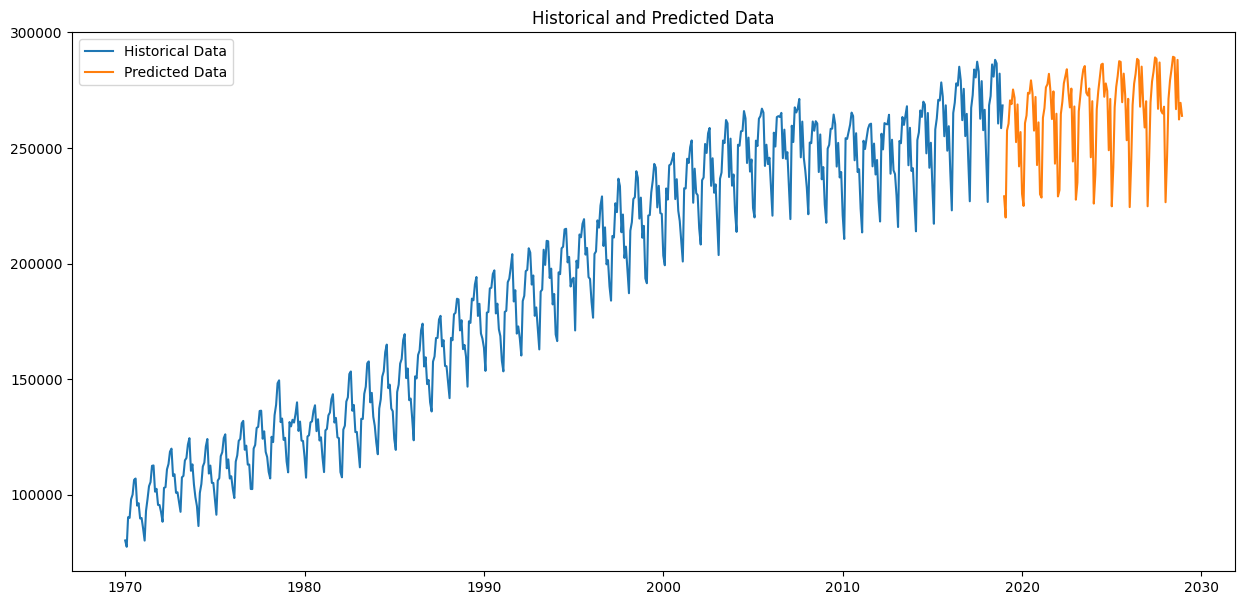

In [155]:
from pandas.tseries.offsets import DateOffset

future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, future_periods+1)]

future_df = pd.DataFrame(data=future_predictions_orig_scale, index=future_dates, columns=['Prediction'])

full_df = pd.concat([df,future_df])

plt.figure(figsize=(15,7))
plt.plot(full_df.index, full_df['Value'], label='Historical Data')
plt.plot(future_df.index, future_df['Prediction'], label='Predicted Data')
plt.legend(loc='best')
plt.title('Historical and Predicted Data')

# Saving Models

**TASK: Optional, Save your model!**

In [156]:
model.save('my_rnn_exercise_model.h5')